## Import Necssaries Libraries

In [202]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Data Loading & Initial Exploration

In [203]:
def load_data(path) :
    df= pd.read_csv(path)
    return df
    
df = load_data("D:\Level 3\winequality-red.csv")    


In [204]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Basic Data Exploration Functions

In [205]:
def check_missing(df):
    """Return the number of missing values per column."""
    return df.isnull().sum()

def basic_info(df):
    """Print basic info about the DataFrame."""
    return df.info()

def statistical_summary(df):
    """Return transposed statistical summary."""
    return df.describe().T

def check_duplicated(df , drop = False):
    num_duplicates = df.duplicated().sum()

    if drop : 
        df_cleaned = df.drop_duplicates()
        print(f"Removed {num_duplicates} duplicated rows.")
        return df_cleaned
    else:
        print(f"Found {num_duplicates} duplicated rows.")
        return num_duplicates


def numerical_categorical_columns(df):
    """Return numerical and categorical column lists."""
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    return numeric_cols, categorical_cols

def summary_dataframe(df):
    """Return summary of data types, unique values, and null ratios."""
    d_types = df.dtypes
    n_uniq = df.nunique()
    ratio = df.isnull().sum() / len(df)
    return pd.DataFrame({
        'DTypes': d_types,
        'N_Uniq': n_uniq,
        'Null_Ratio': ratio
    })
def summarize_distribution_by_class(df, class_column='quality'):

    print("Mean values grouped by class:")
    print(df.groupby(class_column).mean().T)
    
    print("\nSkewness of each feature:")
    print(df.skew(numeric_only=True))
    
    print("\nKurtosis of each feature:")
    print(df.kurtosis(numeric_only=True))
    


## Full Dataset Overview

In [206]:
def overview(df):

    print("----- BASIC INFO -----")
    basic_info(df)

    print("\n----- MISSING VALUES -----")
    print(check_missing(df))

    print("\n----- DUPLICATED ROWS -----")
    print(f"Duplicated Rows: {check_duplicated(df , drop = True)}")

    print("\n----- NUMERIC & CATEGORICAL COLUMNS -----")
    num_cols, cat_cols = numerical_categorical_columns(df)
    print(f"Numerical Columns: {num_cols}")
    print(f"Categorical Columns: {cat_cols}")

    print("\n----- STATISTICAL SUMMARY -----")
    print(statistical_summary(df))

    print("\n----- DATAFRAME SUMMARY -----")
    print(summary_dataframe(df))

    print("\n----- DISTRIBUTION BY CLASS -----")
    summarize_distribution_by_class(df, class_column='quality')

overview(df)    

----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

----- MISSING VALUES -----
fixed acidity           0
volatile acidity        0
citric acid            

##  Creating Interaction Features: Total Acidity, Sulfur Ratio, and Density-Alcohol Product


In [207]:
def overview(df):

    print("----- BASIC INFO -----")
    basic_info(df)

    print("\n----- MISSING VALUES -----")
    print(check_missing(df))

    print("\n----- DUPLICATED ROWS -----")
    print(f"Duplicated Rows: {check_duplicated(df , drop = True)}")

    print("\n----- NUMERIC & CATEGORICAL COLUMNS -----")
    num_cols, cat_cols = numerical_categorical_columns(df)
    print(f"Numerical Columns: {num_cols}")
    print(f"Categorical Columns: {cat_cols}")

    print("\n----- STATISTICAL SUMMARY -----")
    print(statistical_summary(df))

    print("\n----- DATAFRAME SUMMARY -----")
    print(summary_dataframe(df))

    print("\n----- DISTRIBUTION BY CLASS -----")
    summarize_distribution_by_class(df, class_column='quality')

overview(df)    

In [208]:
df = add_interaction_features(df)

## Exploring Interactions Between Features and Their Relationship to Wine Quality

In [209]:
def plot_pairwise_relationships(df, features, hue=None, palette="Set2", height=2.5):

    if hue:
        sns.pairplot(df[features + [hue]], hue=hue, palette=palette, height=height)
    else:
        sns.pairplot(df[features], palette=palette, height=height)
    
    plt.suptitle("Pairwise Feature Relationships", y=1.02)
    plt.show()


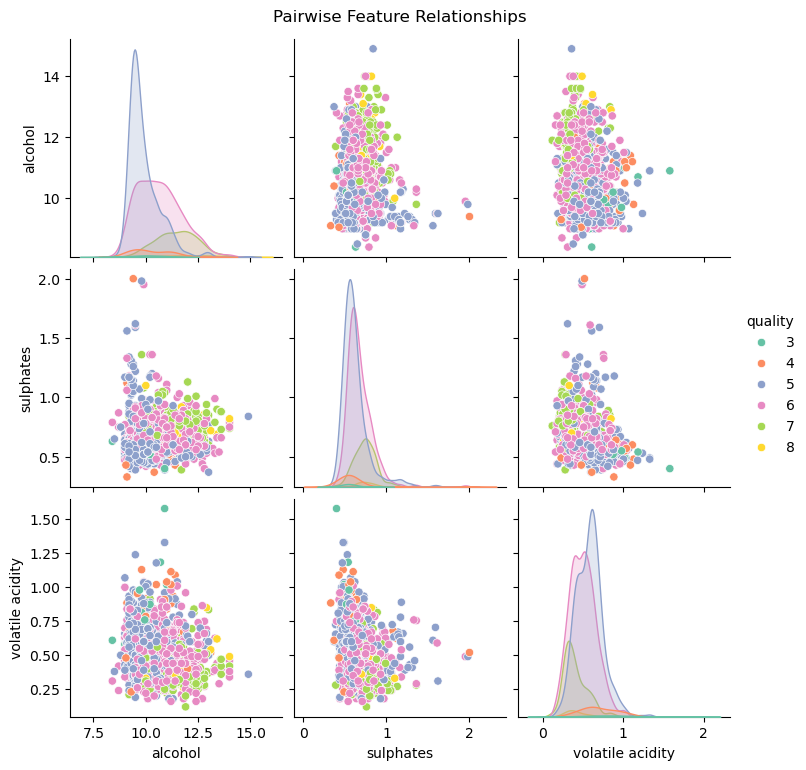

In [210]:
plot_pairwise_relationships(df, features=['alcohol', 'sulphates', 'volatile acidity'], hue='quality')


## Visualizing Numerical Features vs. Target

In [211]:
def numerical_vs_target(df, target='quality'):

    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    if target in numeric_cols:
        numeric_cols.remove(target)

    num_plots = len(numeric_cols)
    cols = 3  
    rows = math.ceil(num_plots / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=target, y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs {target}', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


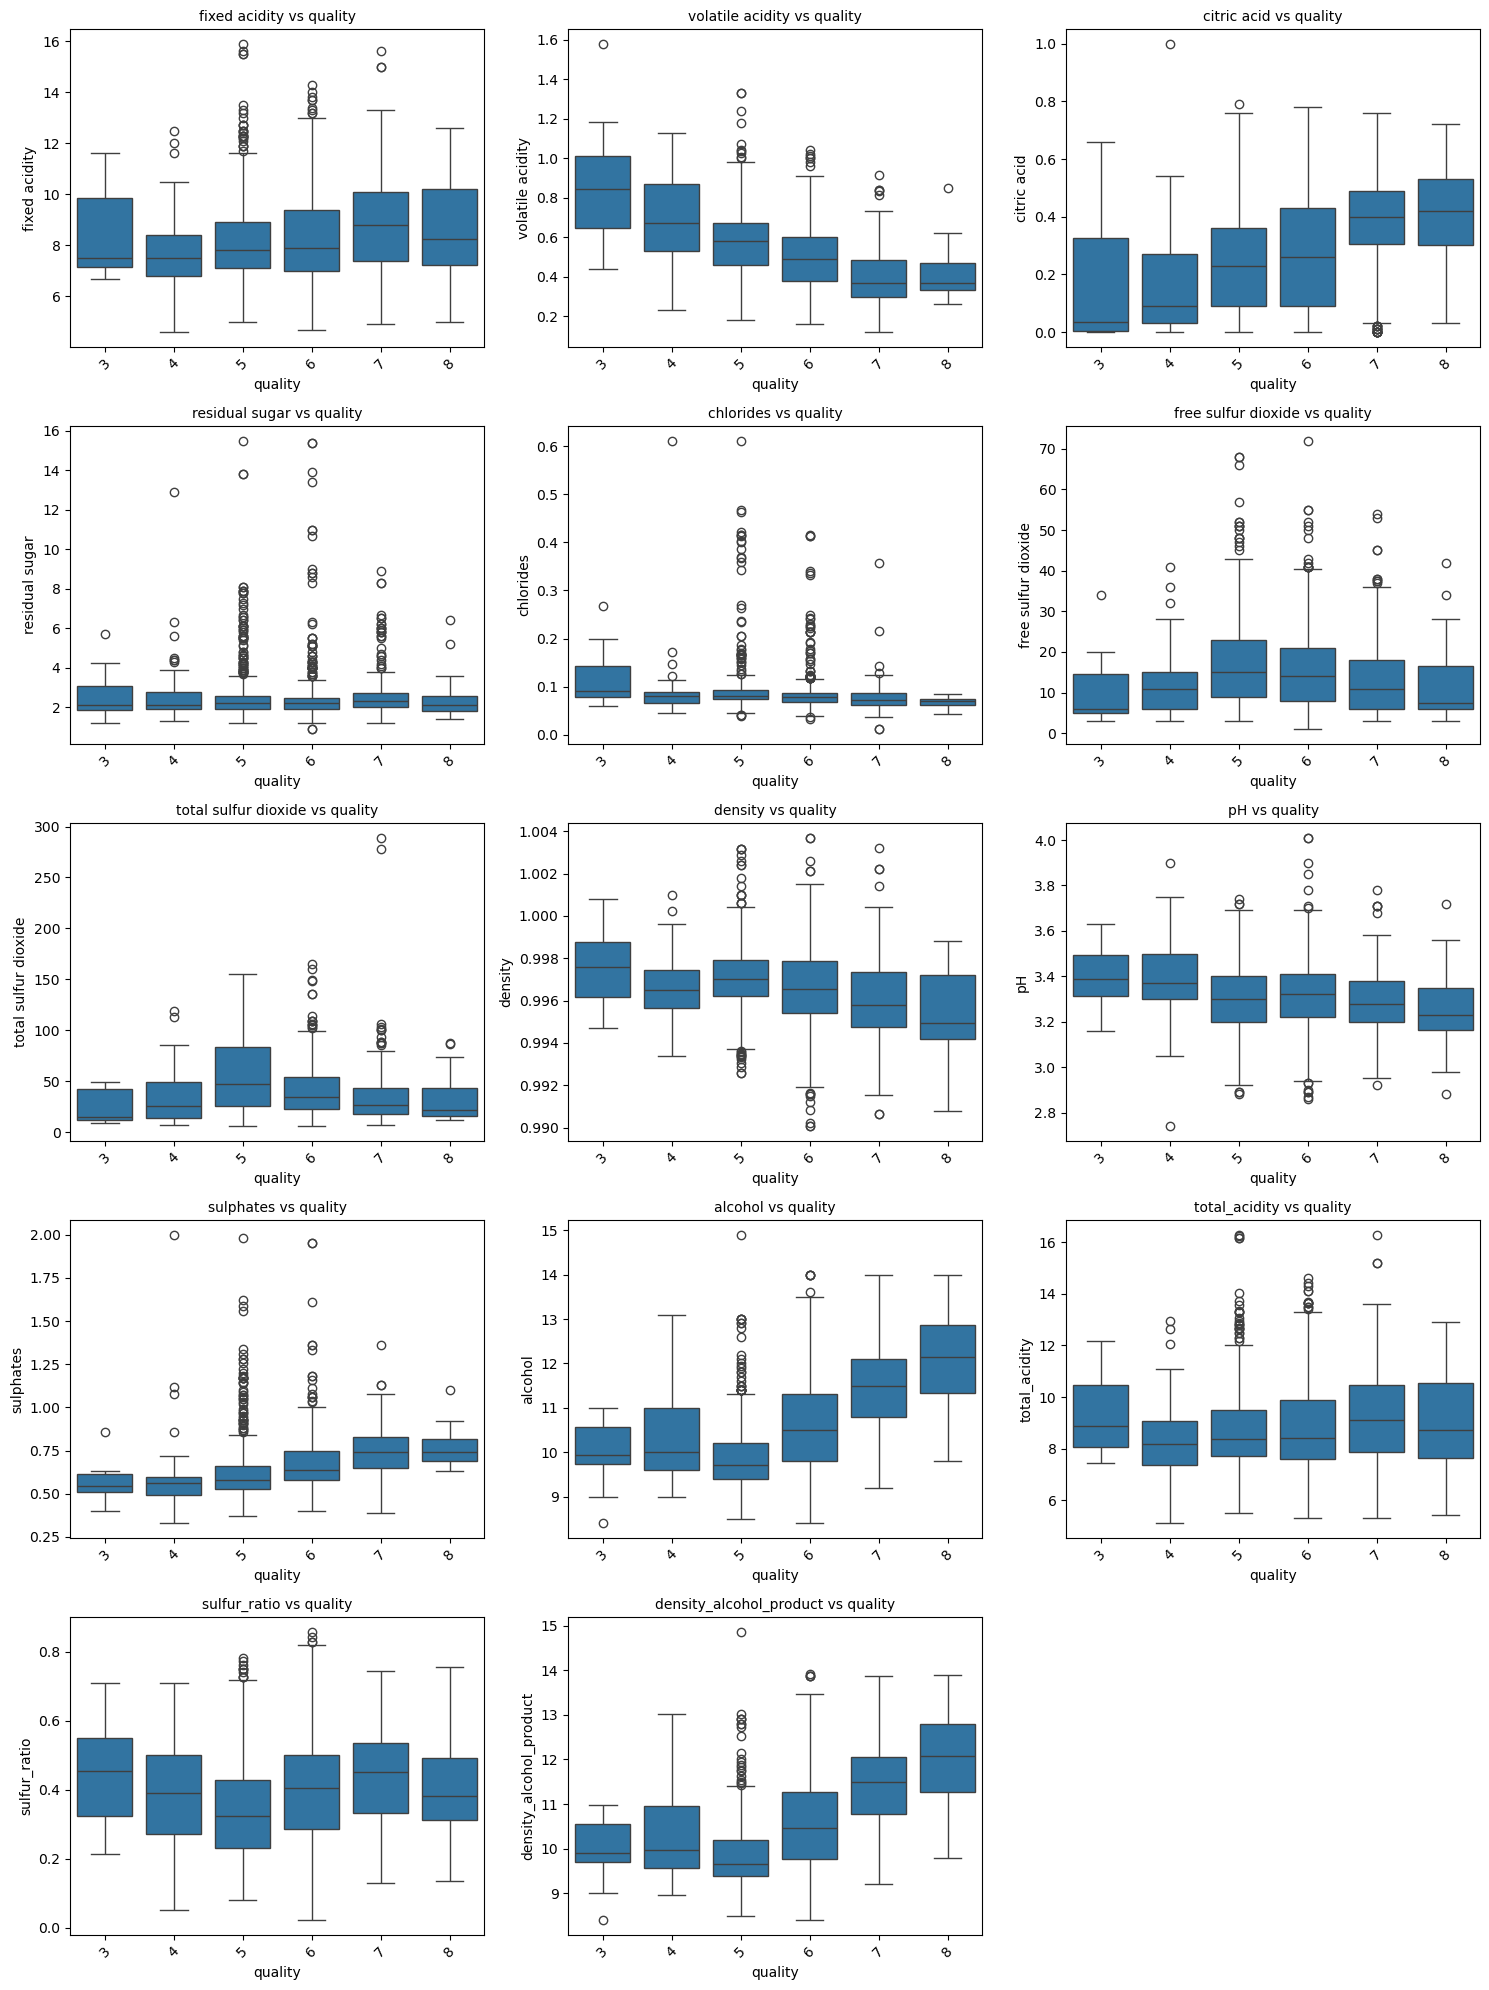

In [212]:
numerical_vs_target(df, target='quality')

##  Numerical Feature Distributions

In [213]:
def numaric_distribution(df):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols = len(numeric_cols)

    cols = 3 
    rows = math.ceil(num_cols / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

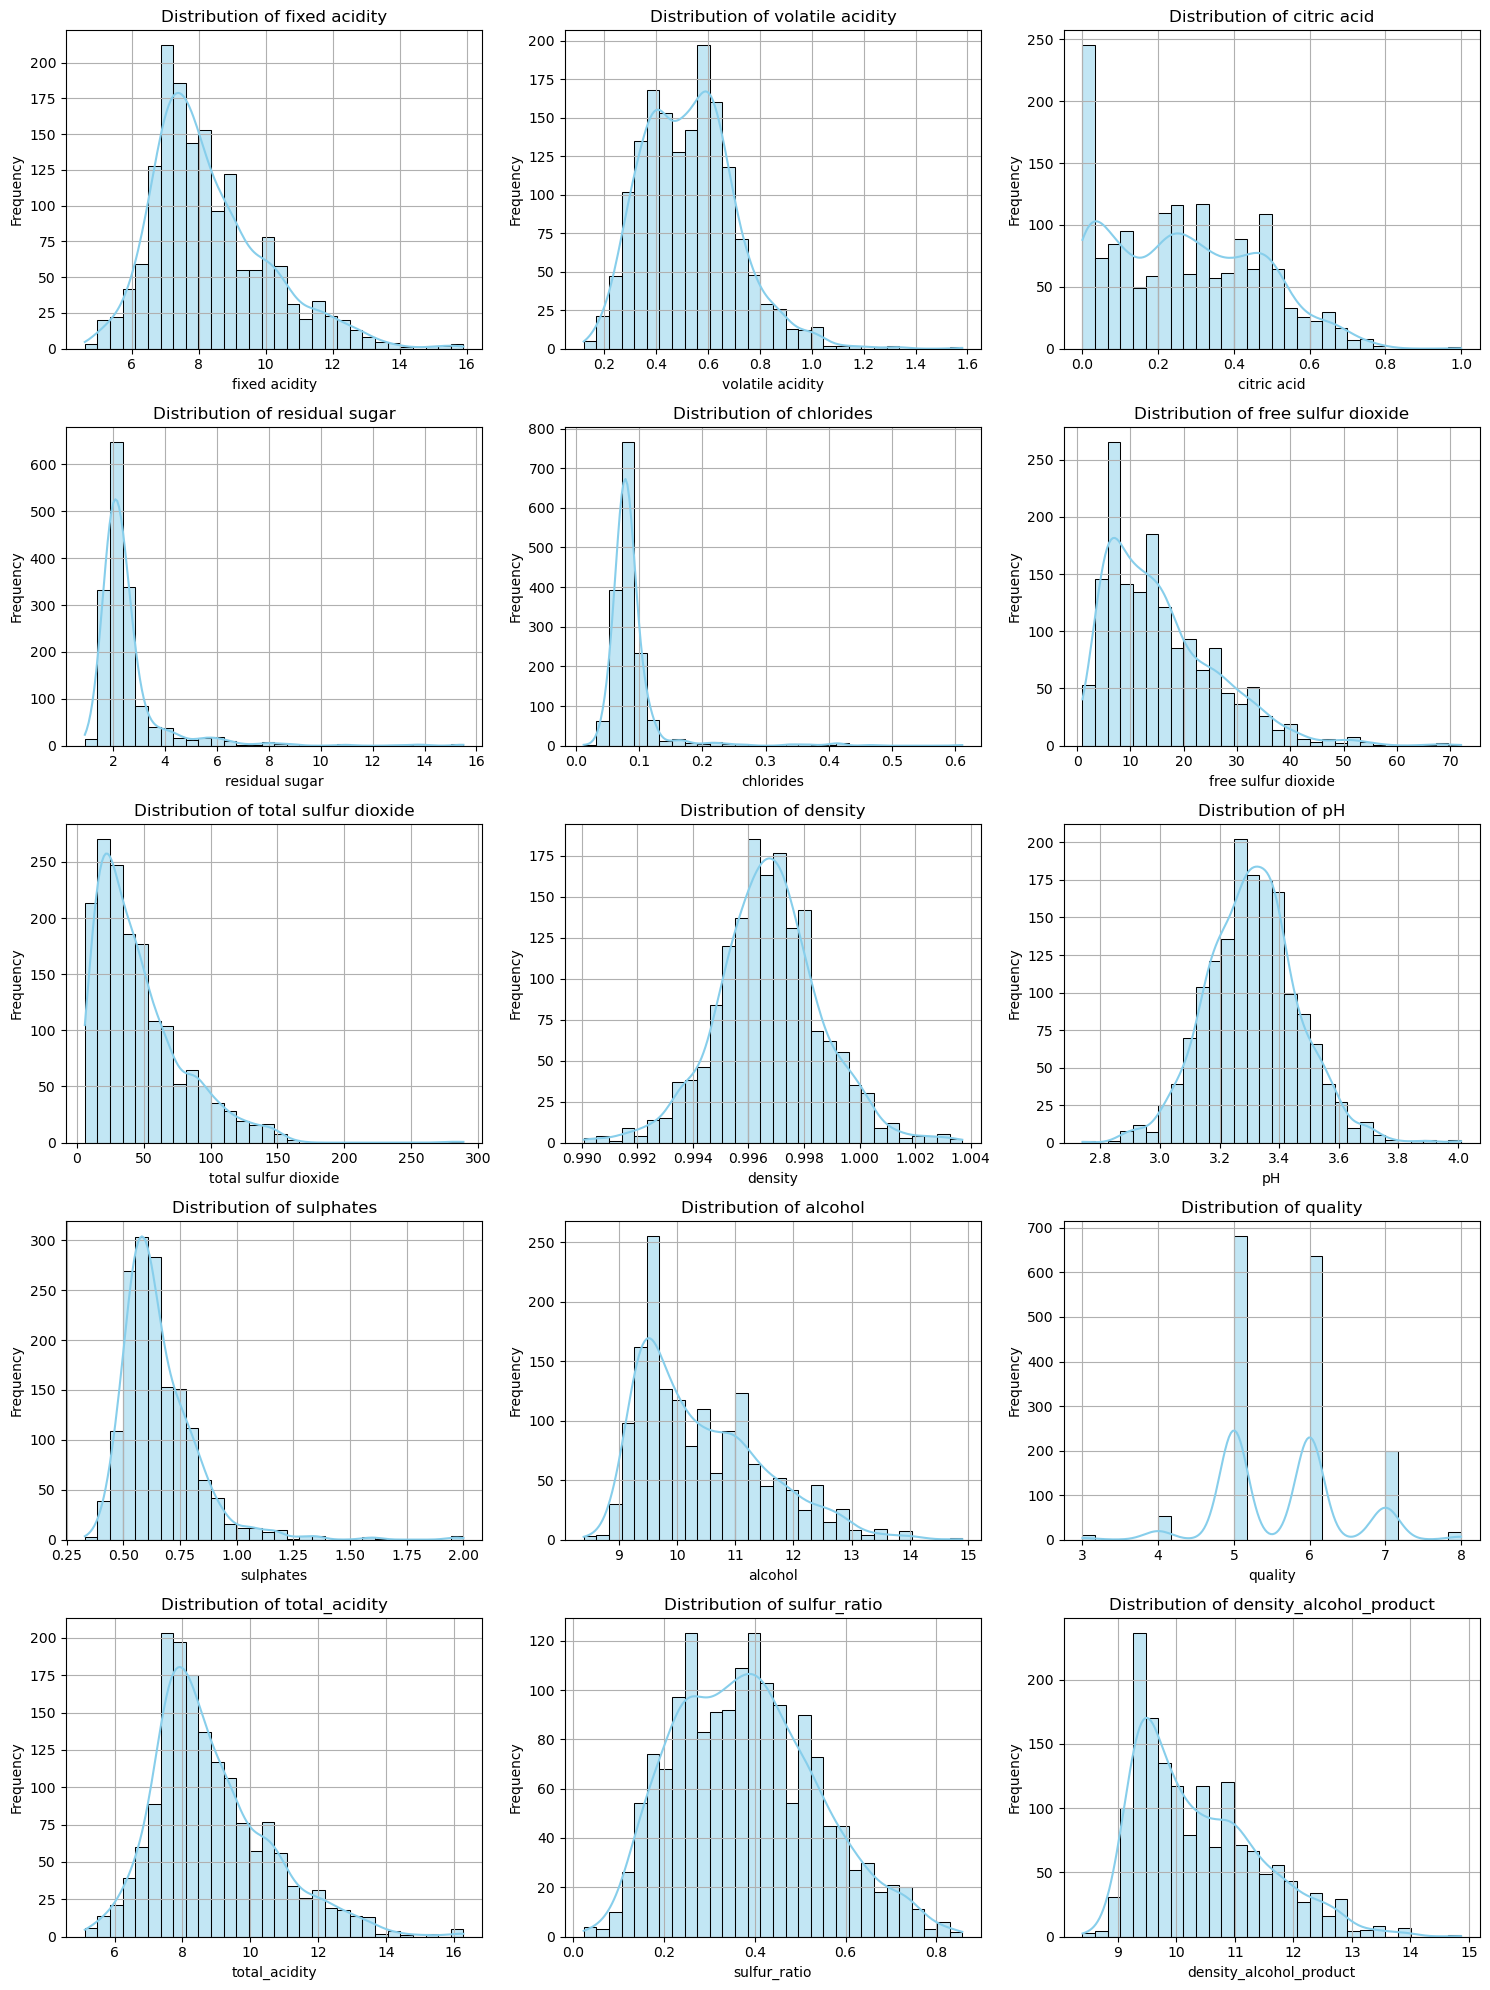

In [214]:
numaric_distribution(df)


##  Outlier Detection with Boxplots

In [215]:
def outlier_detect(df):
    plt.figure(figsize =(6,4))
    sns.boxplot(data = df ,orient= 'h')

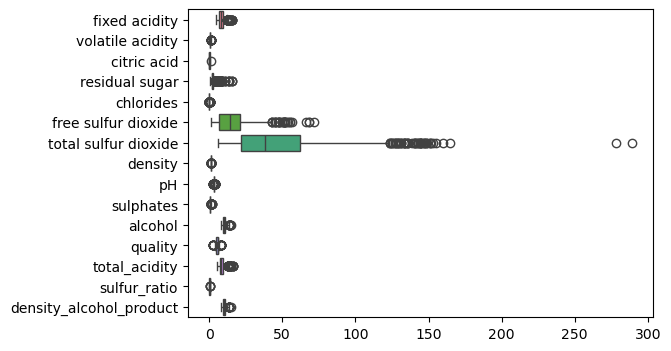

In [216]:
outlier_detect(df)

## Feature Selection Based on Correlation with Target and Visual Heatmap

Correlation with target:
density_alcohol_product    0.477239
alcohol                    0.476166
sulphates                  0.251397
citric acid                0.226373
sulfur_ratio               0.194113
fixed acidity              0.124052
total_acidity              0.085709
residual sugar             0.013732
free sulfur dioxide       -0.050656
pH                        -0.057731
chlorides                 -0.128907
density                   -0.174919
total sulfur dioxide      -0.185100
volatile acidity          -0.390558
Name: quality, dtype: float64

Selected features:
['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'density_alcohol_product']


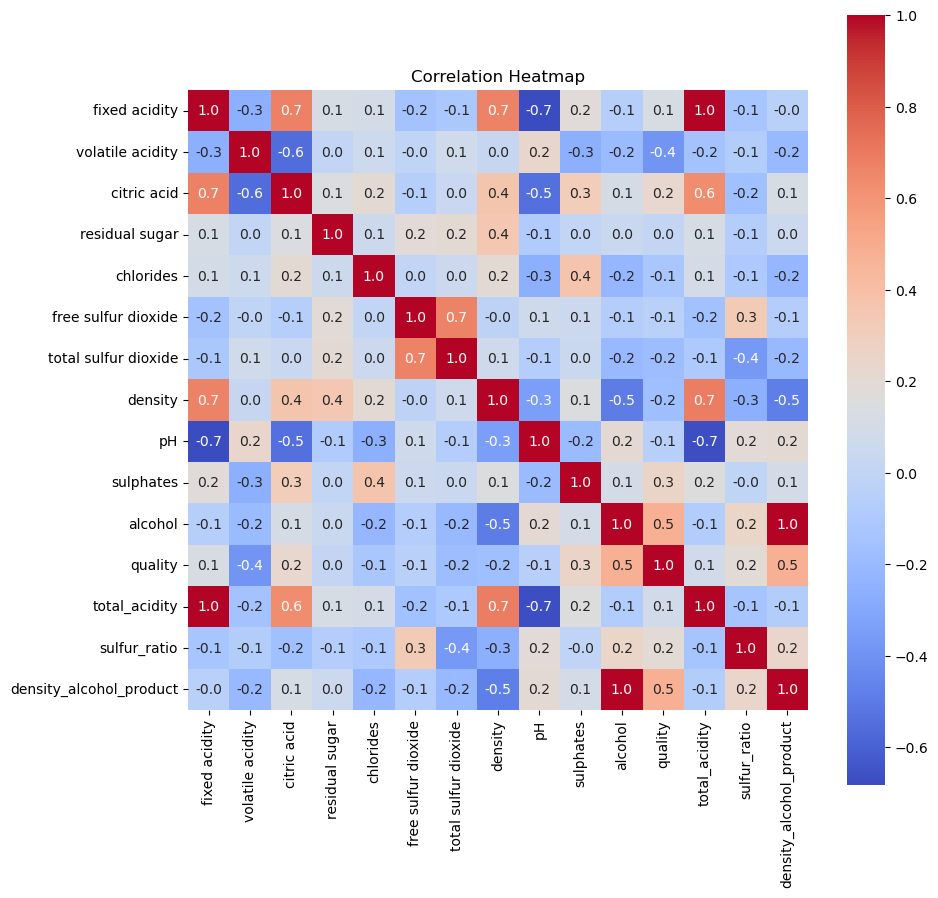

In [217]:
def select_features_by_correlation(df, target_column, threshold=0.2, verbose=True, plot_heatmap=True):
    correlation_matrix = df.corr()
    target_corr = correlation_matrix[target_column].drop(target_column)
    selected_features = target_corr[abs(target_corr) >= threshold].index.tolist()
    
    if verbose:
        print("Correlation with target:")
        print(target_corr.sort_values(ascending=False))
        print("\nSelected features:")
        print(selected_features)
    
    if plot_heatmap:
        plt.figure(figsize=(10, 10))
        sns.heatmap(correlation_matrix, 
                    cbar=True, 
                    square=True, 
                    fmt='.1f', 
                    annot=True, 
                    cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    
    return selected_features

selected = select_features_by_correlation(df, target_column='quality', threshold=0.2)


## Count Number of classes in target 

<Axes: xlabel='quality', ylabel='count'>

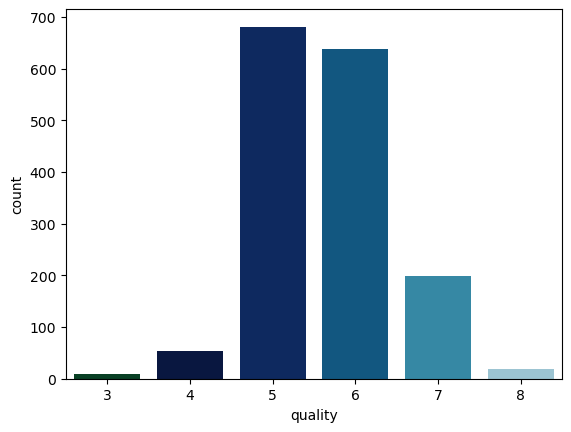

In [218]:
def target_count(df , target = 'quality'):
    return sns.countplot(x=target , data=df, palette='ocean')
target_count(df)    

## Outlier handling using IQR 

In [219]:
def handle_outliers(df):

    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include='number').columns.tolist()

    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned[col] = np.where(
            df_cleaned[col] < lower_bound, lower_bound,
            np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
        )

    return df_cleaned
    

In [220]:
df_cleaned = handle_outliers(df)
df_cleaned['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: quality, dtype: int64

## visualize outliers before after

In [221]:
def visualize_outliers_before_after(df, df_cleaned):

    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols = len(numeric_cols)

    rows = math.ceil(num_cols)  
    fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 3))

    if num_cols == 1:
        axes = np.array([axes])

    for i, col in enumerate(numeric_cols):
        # Before
        sns.boxplot(y=df[col], ax=axes[i][0], color='salmon')
        axes[i][0].set_title(f'Before: {col}')
        axes[i][0].grid(True)

        # After
        sns.boxplot(y=df_cleaned[col], ax=axes[i][1], color='lightgreen')
        axes[i][1].set_title(f'After: {col}')
        axes[i][1].grid(True)

    # Remove unused axes if needed
    if len(numeric_cols) < len(axes):
        for j in range(len(numeric_cols), len(axes)):
            fig.delaxes(axes[j][0])
            fig.delaxes(axes[j][1])

    plt.tight_layout()
    plt.show()


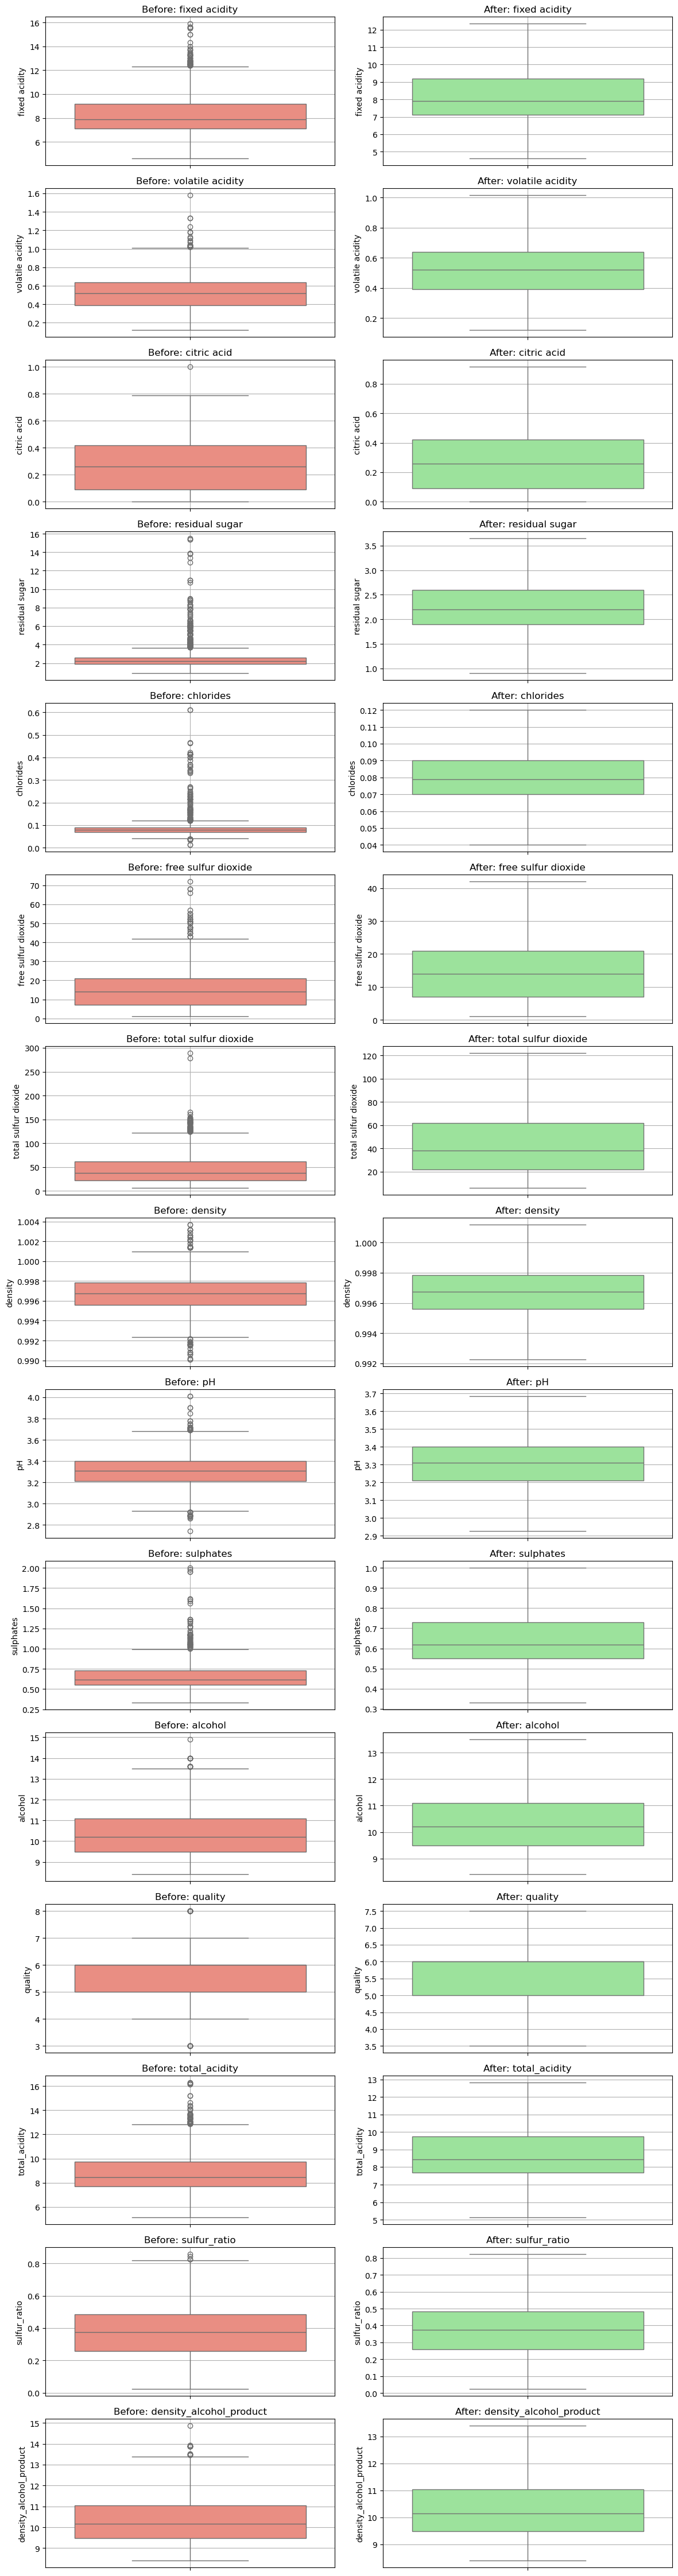

In [222]:
visualize_outliers_before_after(df, df_cleaned)

## Combining Wine Quality into Categories

In [223]:

def compine_quality(val) :
    if val <= 4.0 :
        return "low"
    elif val == 5.0 or val ==6.0 :
        return "medium"
    else :
        return 'high'
        
df_cleaned['quality'] = df_cleaned['quality'].apply(compine_quality)       


In [224]:
df_cleaned['quality'].value_counts()


medium    1319
high       217
low         63
Name: quality, dtype: int64

## Select Features and Target

In [225]:
def get_selected_data(df_cleaned, selected_features, target_column):

    columns_to_keep = selected_features + [target_column]
    return df_cleaned[columns_to_keep]


##  Split into Features (X) and Target (y)

In [226]:
def split_features_target(df_cleaned, target_column='quality'):
    X = df_cleaned.drop(columns=[target_column])
    y = df_cleaned[target_column]
    return X, y
X, y = split_features_target(df_cleaned)

## Scale Features

In [227]:
def scale_features(X, method='standard'):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid method. Choose 'standard' or 'minmax'.")

    X_scaled = scaler.fit_transform(X)
    return X_scaled

X_scaled = scale_features(X, method='standard')

## Train/Test Split with Optional SMOTE Oversampling

In [228]:
from imblearn.over_sampling import SMOTE
def split_train_test(X, y, test_size=0.2, random_state=42, oversample=True):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    if oversample:
        smote = SMOTE(random_state=random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

In [229]:
X_train, X_test, y_train, y_test = split_train_test(X_scaled, y)


## modeling 

In [242]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

## Visualize performance with a confusion matrix  and class report 

In [247]:
def evaluate_model(model, model_name):
    print(f"\n--- {model_name} ---")
    kfolds(model, model_name)
    train(model, model_name)
    class_report(model)
    conf_matrix(model)
    



--- Logistic Regression ---
Logistic Regression score on cross validation: 83.23977987421382%
Logistic Regression model score on Training data: 76.0821484992101%
Logistic Regression model score on Testing data: 63.125%
              precision    recall  f1-score   support

        high       0.34      0.70      0.46        43
         low       0.15      0.62      0.24        13
      medium       0.93      0.62      0.74       264

    accuracy                           0.63       320
   macro avg       0.47      0.64      0.48       320
weighted avg       0.82      0.63      0.68       320


--- Random Forest ---
Random Forest score on cross validation: 83.99056603773583%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 84.0625%
              precision    recall  f1-score   support

        high       0.58      0.65      0.62        43
         low       0.29      0.15      0.20        13
      medium       0.90      0.91      0.90       

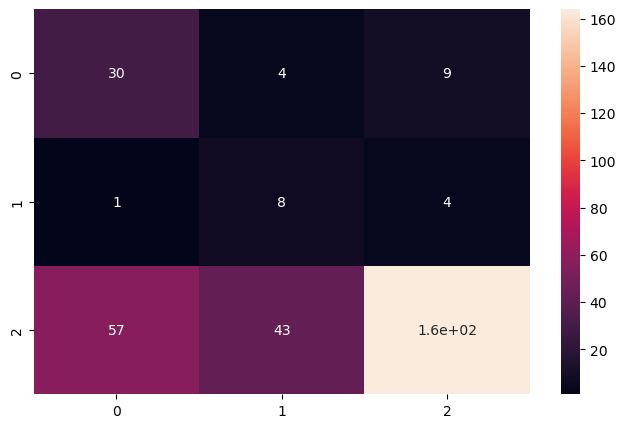

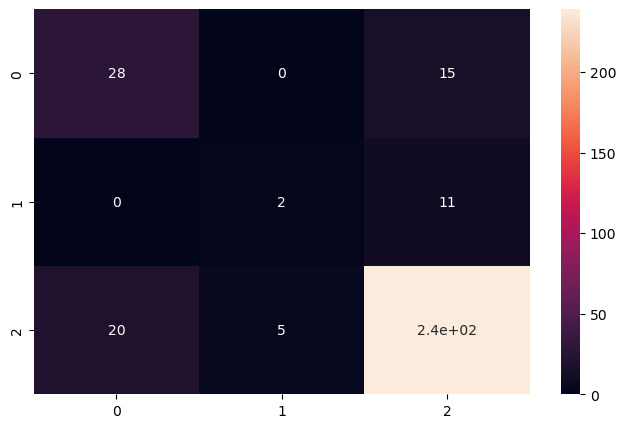

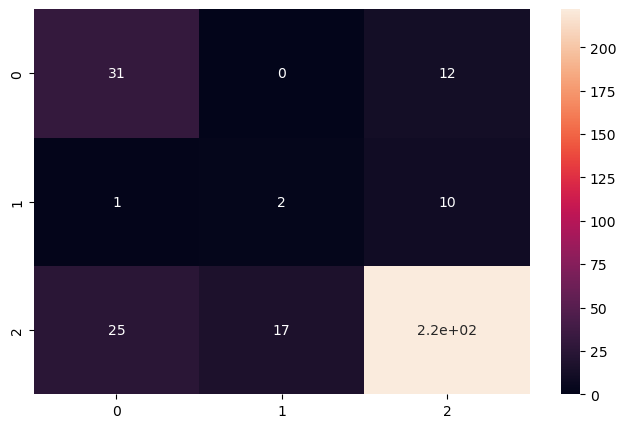

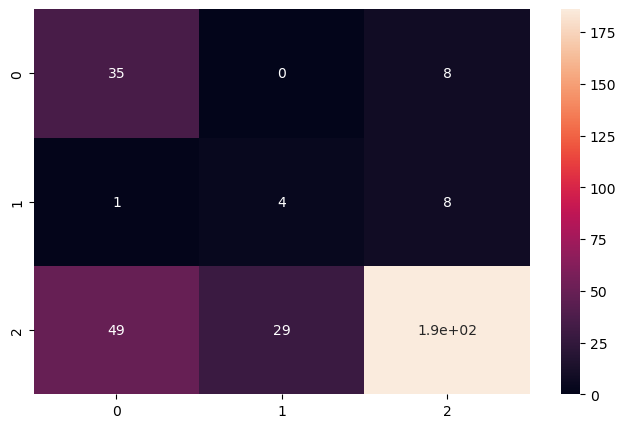

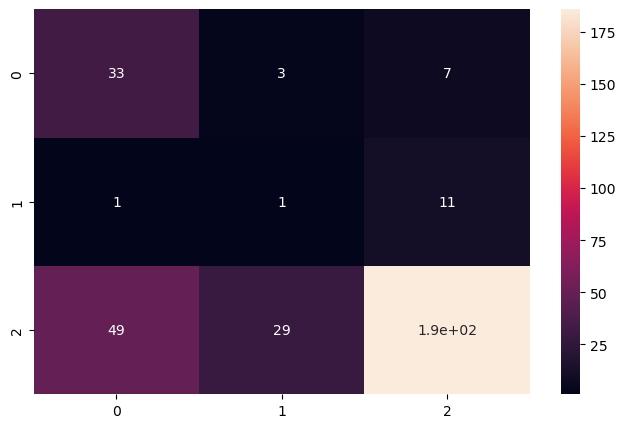

In [248]:
models = [
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100 , class_weight='balanced'), "Random Forest"),
    (BaggingClassifier(n_estimators=10 ,), "Bagging"),
    (GradientBoostingClassifier(n_estimators=20), "Gradient Boosting"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")
]

for model, name in models:
    evaluate_model(model, name)

## Model Comparison Summary

In [238]:
data = {
    "Model": ["Logistic Regression", "Random Forest", "Bagging", "Gradient Boosting", "K-Nearest Neighbors"],
    "Training Accuracy (%)": [76.08, 100.0, 99.59, 84.80, 91.94],
    "Testing Accuracy (%)": [63.13, 84.69, 79.38, 70.31, 68.75],
    "Cross-Validation Score (%)": [83.24, 83.55, 80.36, 83.18, 81.30],
    "F1 Score - High": [0.46, 0.65, 0.60, 0.55, 0.52],
    "F1 Score - Low": [0.24, 0.20, 0.12, 0.17, 0.04],
    "F1 Score - Medium": [0.74, 0.91, 0.88, 0.80, 0.79],
}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by="Testing Accuracy (%)", ascending=False)


print("Model Comparison Summary:")
display(df_sorted.style.background_gradient(cmap='YlGnBu'))


Model Comparison Summary:


,Model,Training Accuracy (%),Testing Accuracy (%),Cross-Validation Score (%),F1 Score - High,F1 Score - Low,F1 Score - Medium
1,Random Forest,100.000000,84.690000,83.550000,0.650000,0.200000,0.910000
2,Bagging,99.590000,79.380000,80.360000,0.600000,0.120000,0.880000
3,Gradient Boosting,84.800000,70.310000,83.180000,0.550000,0.170000,0.800000
4,K-Nearest Neighbors,91.940000,68.750000,81.300000,0.520000,0.040000,0.790000
0,Logistic Regression,76.080000,63.130000,83.240000,0.460000,0.240000,0.740000


## Run hyperparameter tuning using GridSearchCV

In [233]:
def run_grid_search(model, param_grid, X_train, y_train, scoring='f1_macro', cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    return grid_search.best_estimator_

In [234]:
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}


In [235]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

best_models = {}

for name, model in models.items():
    print(f"\n Grid Search for {name}")
    best_model = run_grid_search(model, param_grids[name], X_train, y_train)
    best_models[name] = best_model


 Grid Search for Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 10, 'solver': 'lbfgs'}
Best score: 0.7567205805235127

 Grid Search for Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9421233678053882

 Grid Search for KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9118598176884536

 Grid Search for Gradient Boosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.9333673030219831
